In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('file11_output.csv')

In [5]:
df.set_index('filename', inplace=True)

In [8]:
df

,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,feature 10,feature 11,feature 12,feature 13
filename,,,,,,,,,,,,,
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X320002 (Month 4).mp3,-304.478279,88.447660,13.372644,-14.371087,-20.476223,-5.530841,-10.048357,-11.329163,0.460247,1.109774,-6.931044,-8.370006,-10.980081
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X320061 (Month 8).mp3,-265.435496,119.166720,-9.940413,8.493930,-7.161556,-3.826830,-12.517904,-9.150667,-10.404795,3.559838,-5.569252,4.294892,-2.244846
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X220724 (Month 12).mp3,-224.374014,74.995887,15.161741,-10.353019,-1.856379,-11.181138,-12.276773,4.578007,0.131649,4.270914,-11.819132,9.372124,-14.751224
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X320002 (Month 16).mp3,-388.115274,56.508211,-5.974976,13.921460,-9.220643,9.839543,-22.855285,8.000577,-7.481471,-1.950874,-3.540754,-8.812328,-1.567006
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X320057 (Month 24).mp3,-281.365767,138.678200,-22.024852,1.604364,13.955378,-7.305527,-23.003823,-11.874514,-6.071951,5.841100,-4.750817,-8.474152,-7.495316
...,...,...,...,...,...,...,...,...,...,...,...,...,...
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X320069 (Month 16).mp3,-310.347221,55.584294,-24.525610,33.617985,-30.567329,4.958434,-11.993497,5.630660,1.874447,1.175138,-8.014817,-10.717991,1.824008
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X320002 (Contact 5).mp3,-286.416424,109.560426,-112.206726,35.341385,23.256132,-37.679942,-15.079957,-28.191787,-11.059469,-15.158319,-31.059836,5.981704,-9.242269
/n/home02/ematsumoto/cough_mp3_full/Files_11_mp3/X220863 (Baseline).mp3,-297.936055,96.280620,14.932877,-12.746752,11.925566,-9.392005,-15.027607,-14.191127,-15.843329,0.069010,-4.264338,-2.336939,-8.304114


Note that there are 771 rows while file 11 actually had 1250 files. So either a lot of these files don't have coughs in them, and/or the model used to extract coughs are not detecting all of the coughs present. 

/n/home02/ematsumoto/.local/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/n/home02/ematsumoto/.local/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


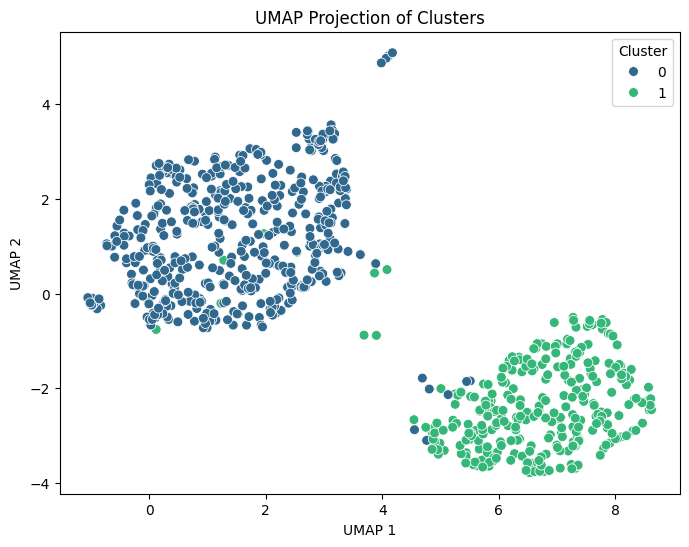

In [7]:
scalar = StandardScaler()
features_scaled = scalar.fit_transform(df)
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(features_scaled)

#umap for dimension reduction and plotting
reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(features_scaled)

# Plotting
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=embedding[:, 0],
    y=embedding[:, 1],
    hue=labels,
    palette='viridis',
    s=50
)
plt.title('UMAP Projection of Clusters')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.legend(title='Cluster')
plt.show()
